In [1]:
# %load ../standard_import.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ##用来做图的设置主题
from mpl_toolkits.mplot3d import axes3d ##3d做图

In [2]:
from sklearn.preprocessing import scale ## scale data 标准化用
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline  
plt.style.use('seaborn-white')

## Load All Required Datasets

In [3]:
advertising=pd.read_csv('./Advertising.csv',usecols=[1,2,3,4]) ##读取csv

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
credits=pd.read_csv('./Credit.csv',usecols=list(range(1,12))) ##读取csv Credit

In [6]:
credits['Student2']=credits.Student.map({'No':0, 'Yes':1})

In [7]:
credits.head(3)## 显示前几行

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [8]:
auto=pd.read_csv("./Auto.csv",na_values='?').dropna()

In [9]:
auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [10]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## Simple Regression

/Users/dingxuanzhang/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


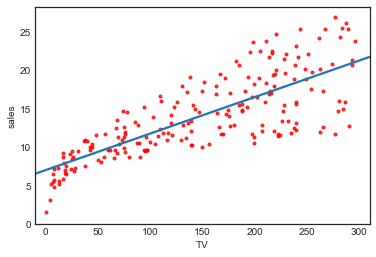

In [11]:
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

In [12]:
# Regression coefficients  OLS
regr=skl_lm.LinearRegression()

X=scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1) #with_mean If True, center the data before scaling.
y=advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

TypeError: iteration over a 0-d array

In [ ]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

In [ ]:
fig=plt.figure(figsize=(15,6)) #图像大小
fig.suptitle('Rss-Regression Coefficients', fontsize=20) ##图像标题 字体大小

ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122,projection='3d') ## Canvas is built

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

In [ ]:
est=smf.ols('sales ~TV', advertising).fit()
est.summary().tables[0]

In [ ]:
est.summary().tables[1]  ##Table 3.1 Test book

In [ ]:
## RSS with regression coefficients
RSS_coef=((advertising.sales-(est.params[0]+est.params[1]*advertising.TV))**2).sum()/1000

In [ ]:
print(RSS_coef)

# More practice on Simple Regression 

In [ ]:
ceosall=pd.read_stata('./Econometrics/CEOSAL1.DTA')

In [ ]:
ceosall.head(10)

In [ ]:
ceoreg=smf.ols('salary~roe', ceosall).fit()

In [ ]:
ceoreg.summary().tables[0]

In [ ]:
ceoreg.summary().tables[1]